Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


**Extracting and Loading Dataset**

In [ ]:
from google.colab import files
files =files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.shape

(4424, 35)

There are 4425 number of rows and 36 columns or variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Except for Target variable all the variables are integer type and float type. Where some of the variables are categories which are encoded in the data to convert into numerical data.


In [ ]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


There are no null values or missing values. But there are some columns which are mispelled which we have to rename those variable names.


Renaming Column Names Mispelled

In [ ]:
df = df.rename(columns={'Nacionality':'Nationality'})

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Checking for unique values for target column

In [ ]:
Target=df['Target'].value_counts()
Target

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


We need to convert this categorical variable into numerical to calculate and find the relation among variables using correlation matrix and pairplot.

In [ ]:
label_encode =LabelEncoder()
df['Target'] = label_encode.fit_transform( df['Target'])
df['Target'].value_counts()

,count
Target,
2,2209
0,1421
1,794


Using Label Encoder, variables in Target column has been encoded to convert categorical data to numerical data.

Using heatmap of correltion matrix is better way of visualization to understand.

<Axes: >

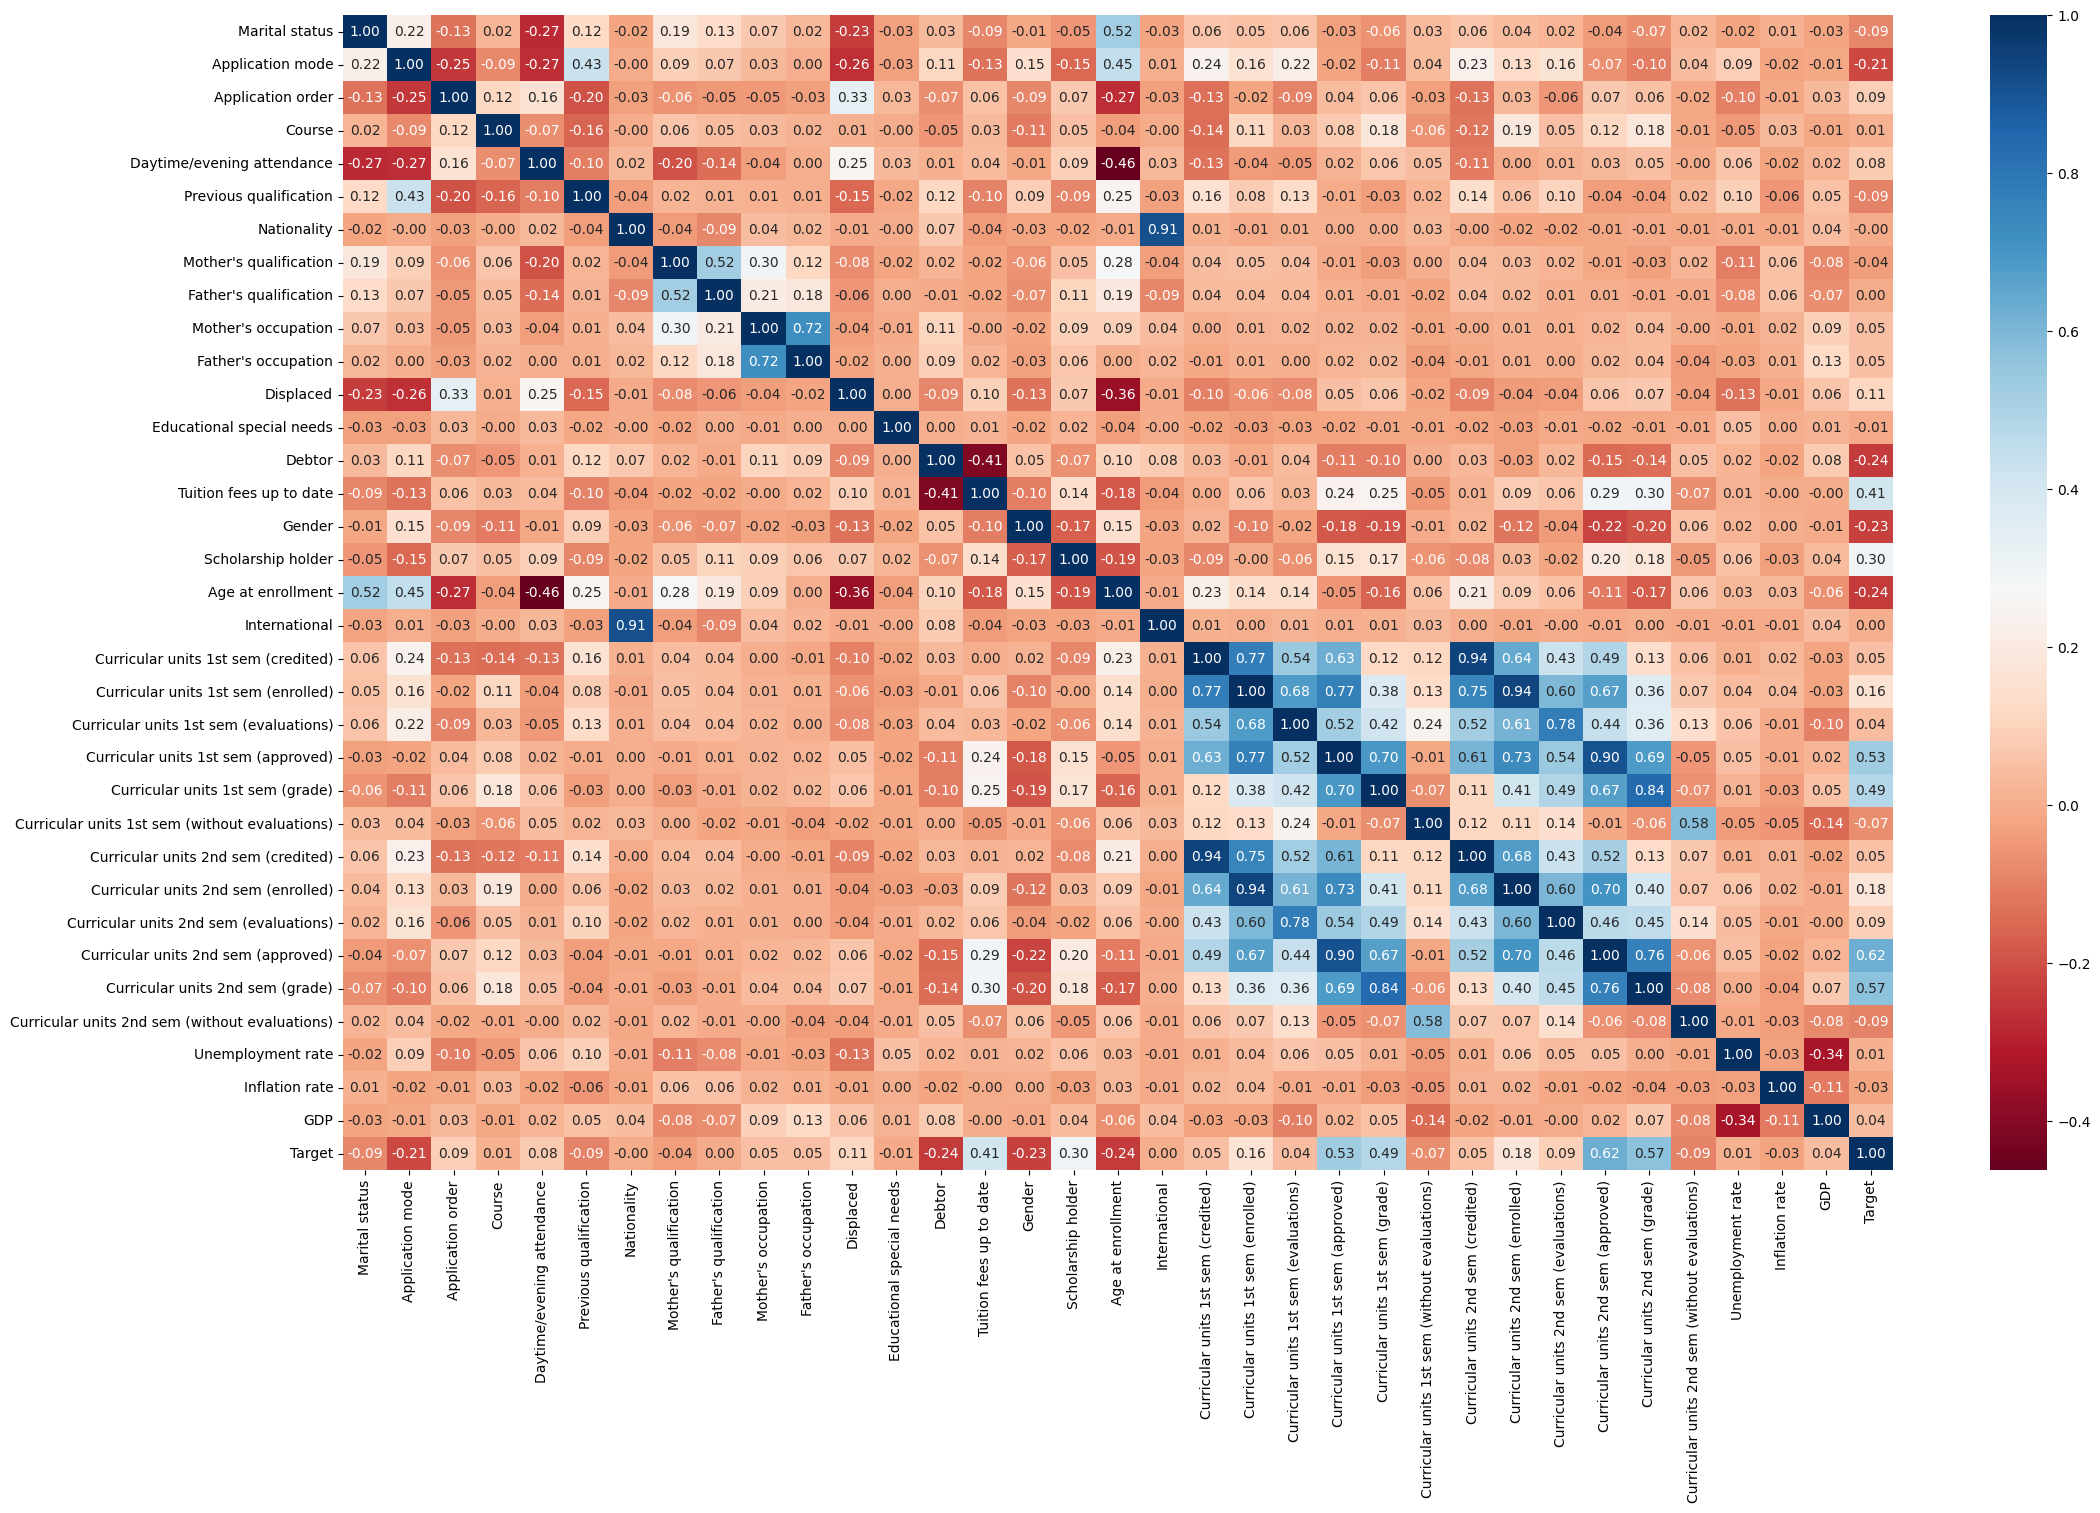

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f",cmap='RdBu')

**Negatively Correlated (one value increases other decreases)** - Dark colours in red indicates that the relation between those variables is more(values far to '0' and near to '1') and those variables effect on Target variable.
**Positively Correlated (as one variable increases the other increases)** - Colours that are darker in blue indicates that, the variables effects much on Target variable.
**Values near to 0 doesnot effect on Target variable.**

We can remove those variables which doesnot effect more like course, Marital status, application mode, application order, Nationality and more.

We can inlude variables like Tuition fees upto date, scholarship holder, curricular units 1st sem (approved), curricular units 1st sem (grade),  curricular units 2nd sem (approved), curricular units 2nd sem (grade), debtor, gender, age at enrollment



In [ ]:
new_df = df[['Target','Tuition fees up to date', 'Scholarship holder', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Debtor', 'Gender', 'Age at enrollment']]
new_df.head()

,Target,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Debtor,Gender,Age at enrollment
0,0,1,0,0,0.000000,0,0.000000,0,1,20
1,2,0,0,6,14.000000,6,13.666667,0,1,19
2,0,0,0,0,0.000000,0,0.000000,0,1,19
3,2,1,0,6,13.428571,5,12.400000,0,0,20
4,2,1,0,5,12.333333,6,13.000000,0,0,45


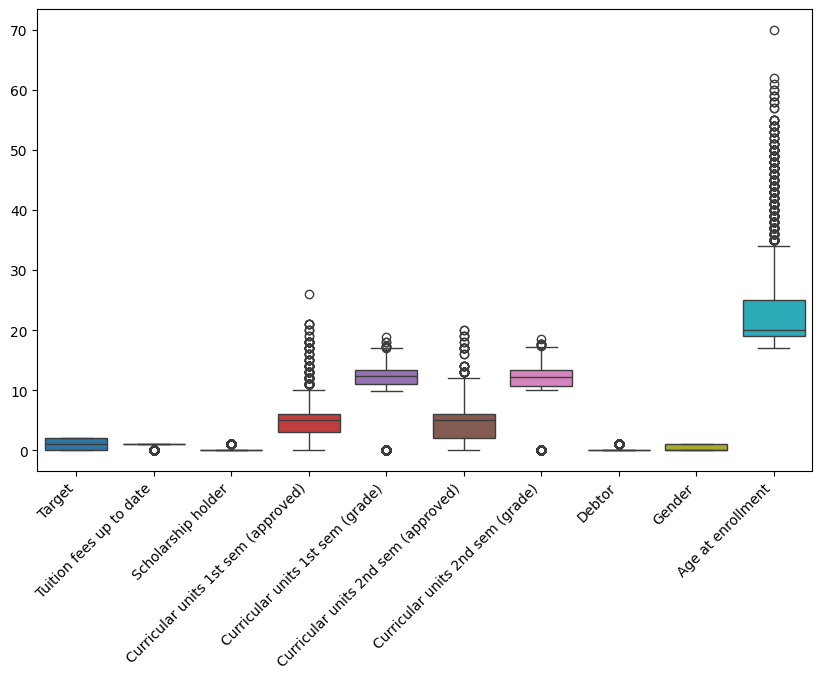

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(new_df)
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

Checking if outliers affect the data by comparing mean and median values including outliers.

In [ ]:

print(new_df.groupby('Age at enrollment').sum().reset_index().mean()['Age at enrollment'])
print(new_df.groupby('Age at enrollment').sum().reset_index().median()['Age at enrollment'])

39.80434782608695
39.5


As mean and median has no much difference and distributed normally, there is no need to remove or replace any outliers.

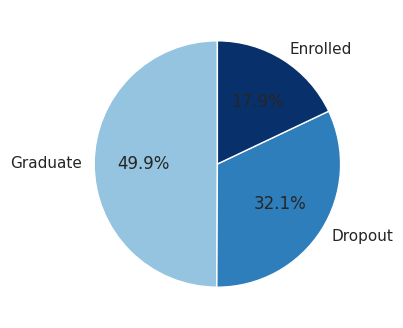

In [ ]:

sns.set(rc={'figure.figsize':(6,4)})
colors = plt.cm.Blues(np.linspace(0.4, 1, len(new_df['Target'].value_counts())))
plt.pie(new_df['Target'].value_counts(), labels=['Graduate','Dropout','Enrolled'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()

In the above pie chart we can observe there are more number of graduates compared to other categories.

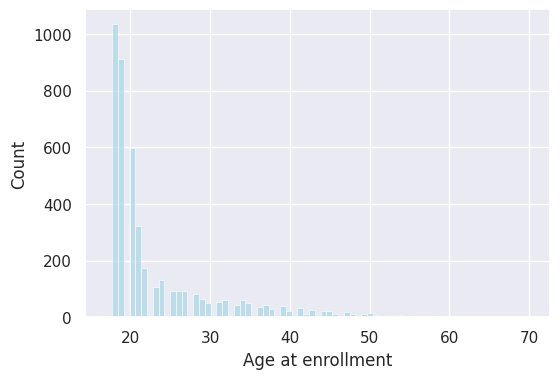

In [ ]:
sns.histplot(data=new_df, x='Age at enrollment', color='lightblue')
plt.show()

There are more number of students who enrolled are at the age ranges from 12-20.

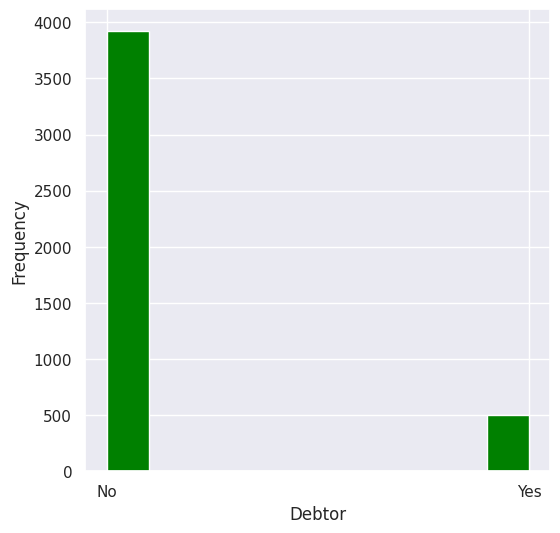

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
plt.hist(new_df['Debtor'],color='green')
plt.xlabel('Debtor')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

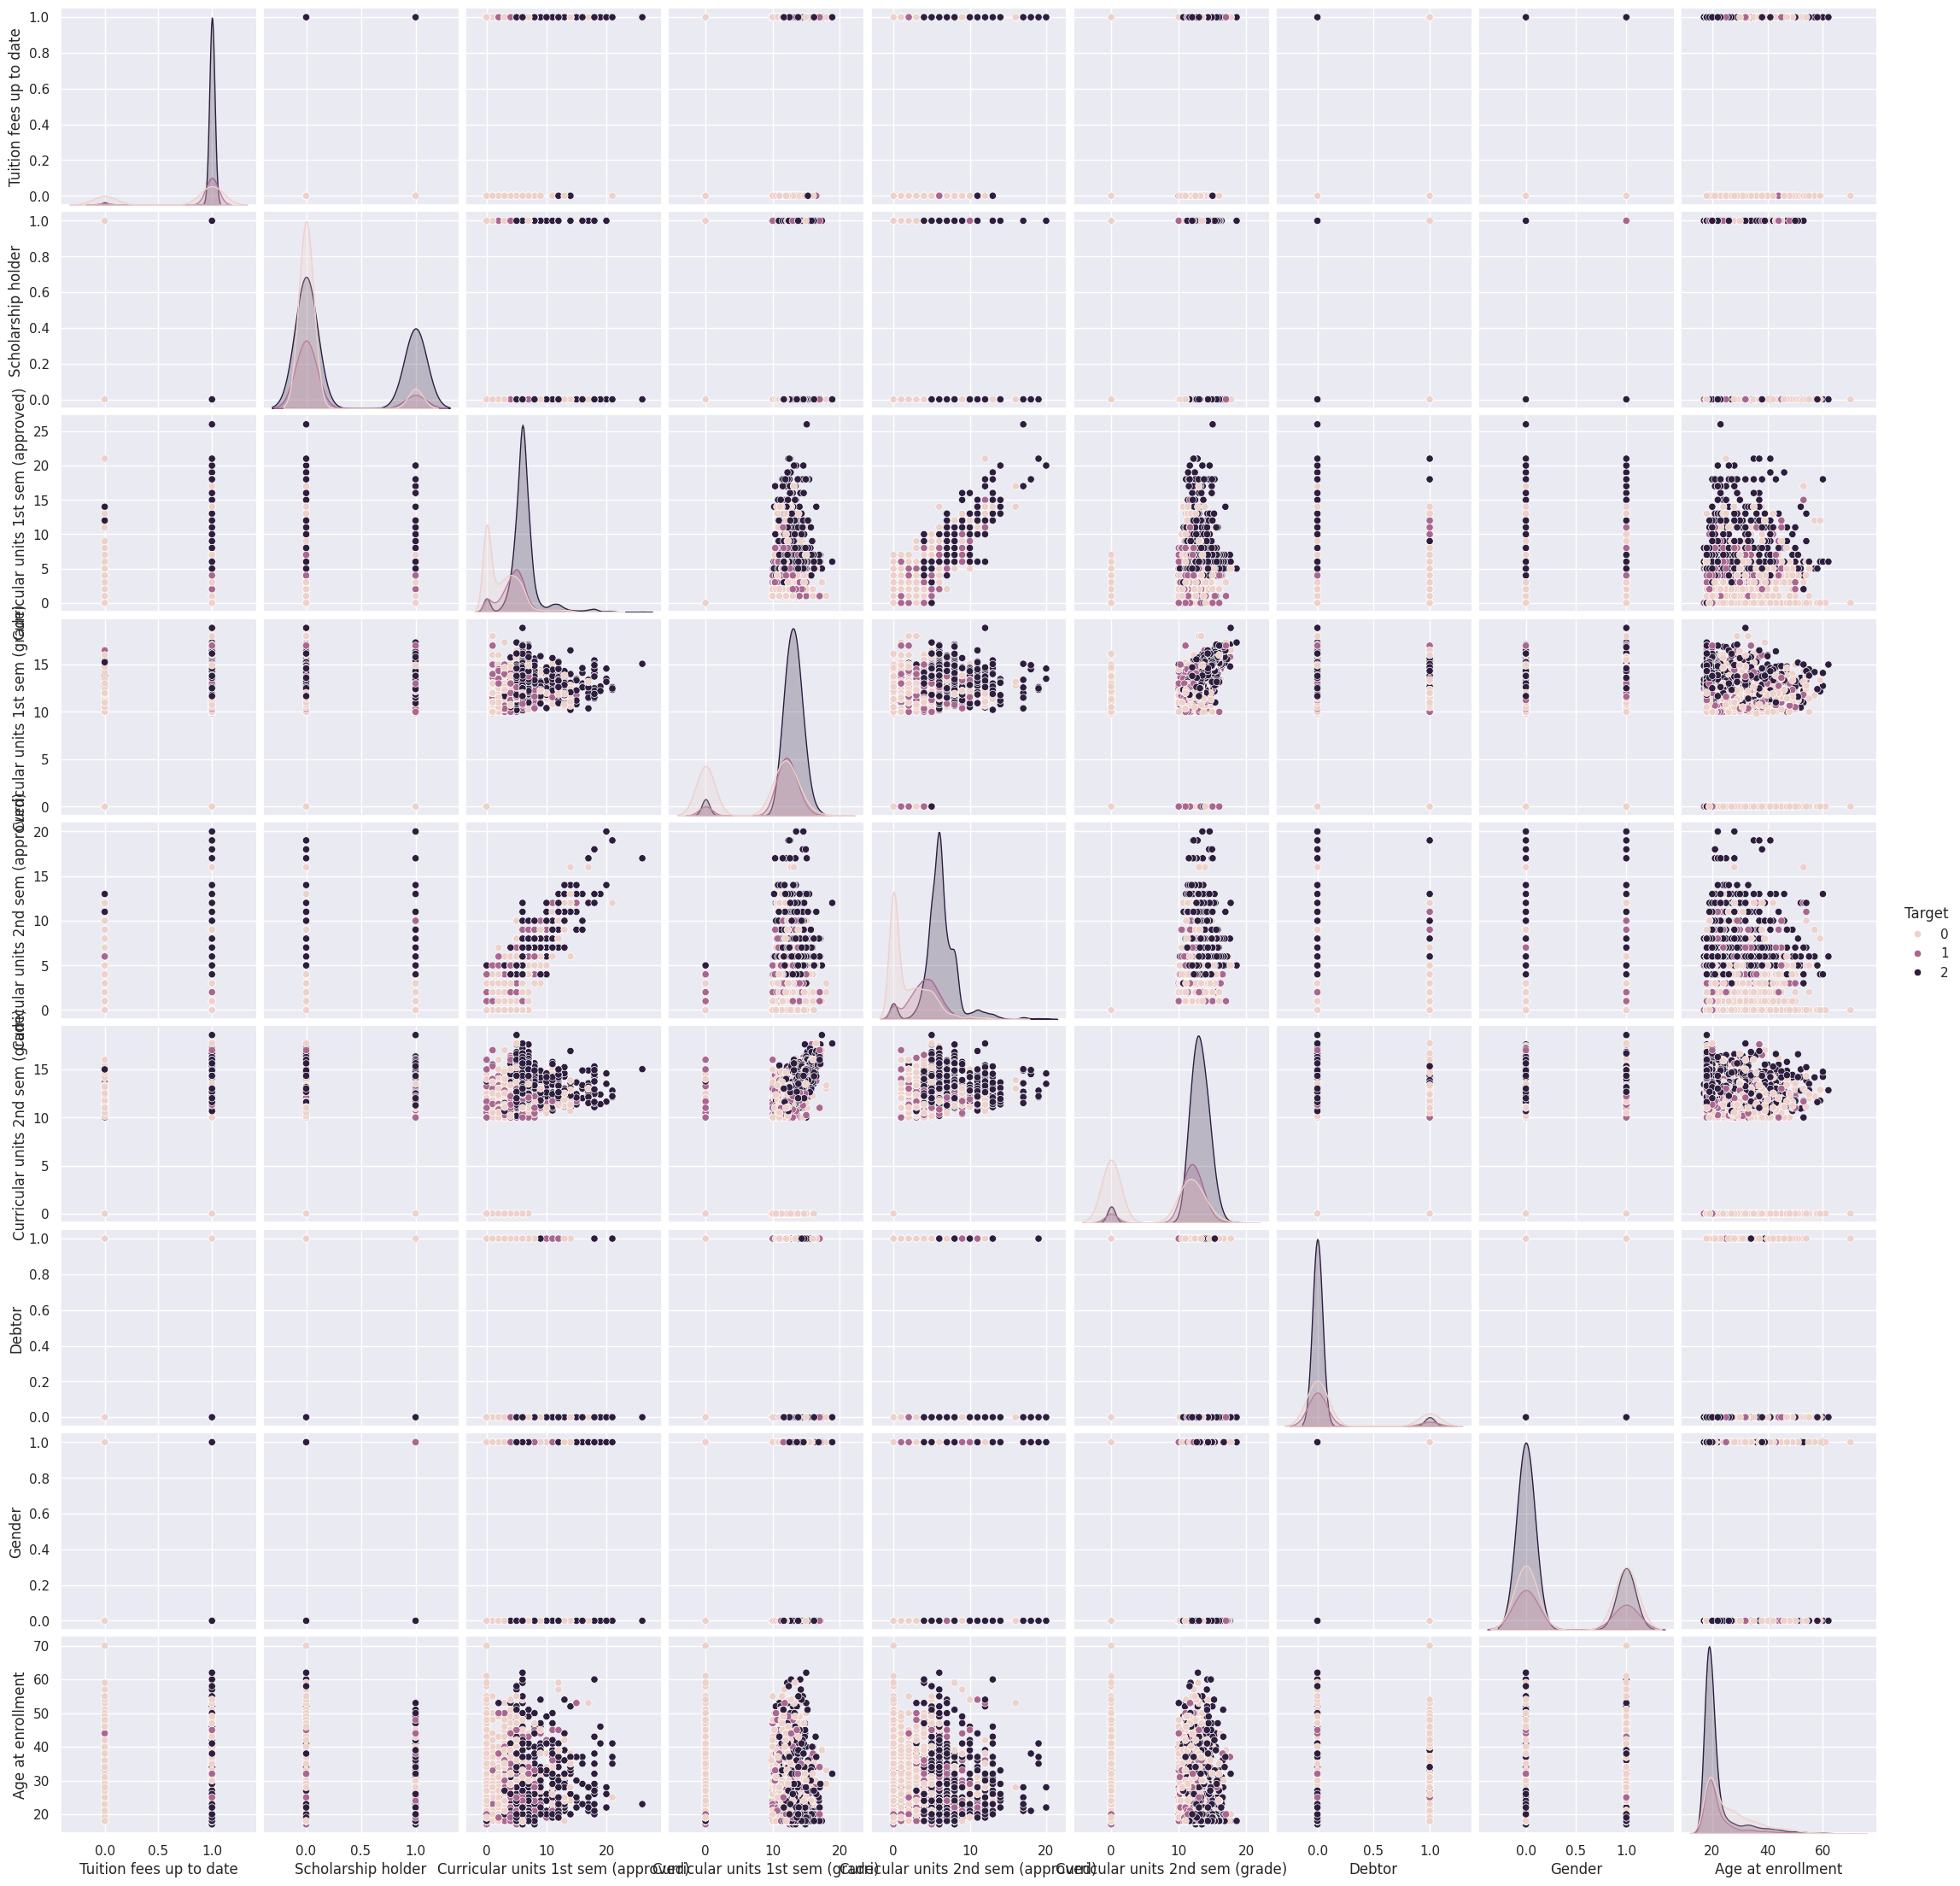

In [66]:
sns.pairplot(new_df, hue='Target')

From pairplot we can conclude that it doesnot satisfy regression assumptions to perform logistic regression we have to choose other models.

Splitting the data into train set and test set

In [ ]:
x=new_df.drop(['Target'],axis=1)
y=new_df['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


**Checking which model best fits using Machine Learning Models**

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Decision Tree Classifier**

In [ ]:
DT=DecisionTreeClassifier(random_state=45)
DT.fit(x_train_scaled,y_train)
y_pred=DT.predict(x_test_scaled)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
pre_score = precision_score(y_test, y_pred, average='weighted')
rec_score = recall_score(y_test, y_pred, average='weighted')
print(f" Accuracy: {accuracy*100:.2f}% | F1 Score: {f1:.3f} | Precision Score: {pre_score:.3f} | Recall Score: {rec_score:.3f}")

[2 0 2 ... 2 2 0]
 Accuracy: 66.64% | F1 Score: 0.667 | Precision Score: 0.668 | Recall Score: 0.666


**Random Forest Classifier**

In [ ]:
RF=RandomForestClassifier(random_state=45)
RF.fit(x_train_scaled,y_train)
y_pred=RF.predict(x_test_scaled)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
pre_score = precision_score(y_test, y_pred, average='weighted')
rec_score = recall_score(y_test, y_pred, average='weighted')
print(f" Accuracy: {accuracy*100:.2f}% | F1 Score: {f1:.3f} | Precision Score: {pre_score:.3f} | Recall Score: {rec_score:.3f}")

[2 0 2 ... 2 2 2]
 Accuracy: 74.77% | F1 Score: 0.736 | Precision Score: 0.732 | Recall Score: 0.748


**Ada Boost Classifier**

In [ ]:
BC=AdaBoostClassifier()
BC.fit(x_train_scaled,y_train)
y_pred=BC.predict(x_test_scaled)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
pre_score = precision_score(y_test, y_pred, average='weighted')
rec_score = recall_score(y_test, y_pred, average='weighted')
print(f" Accuracy: {accuracy*100:.2f}% | F1 Score: {f1:.3f} | Precision Score: {pre_score:.3f} | Recall Score: {rec_score:.3f}")

[0 0 2 ... 2 2 2]
 Accuracy: 74.62% | F1 Score: 0.713 | Precision Score: 0.706 | Recall Score: 0.746


**XG Boost Classifier**

In [ ]:
XG_C=XGBClassifier()
XG_C.fit(x_train_scaled,y_train)
y_pred=XG_C.predict(x_test_scaled)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
pre_score = precision_score(y_test, y_pred, average='weighted')
rec_score = recall_score(y_test, y_pred, average='weighted')
print(f" Accuracy: {accuracy*100:.2f}% | F1 Score: {f1:.3f} | Precision Score: {pre_score:.3f} | Recall Score: {rec_score:.3f}")

[2 0 2 ... 2 2 1]
 Accuracy: 74.92% | F1 Score: 0.737 | Precision Score: 0.733 | Recall Score: 0.749


**K-Nearest Neighbor Classifier**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)
y_pred=knn.predict(x_test_scaled)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
pre_score = precision_score(y_test, y_pred, average='weighted')
rec_score = recall_score(y_test, y_pred, average='weighted')
print(f" Accuracy: {accuracy*100:.2f}% | F1 Score: {f1:.3f} | Precision Score: {pre_score:.3f} | Recall Score: {rec_score:.3f}")

[0 0 2 ... 2 2 2]
 Accuracy: 72.67% | F1 Score: 0.721 | Precision Score: 0.716 | Recall Score: 0.727


**Support Vector Classifier**

In [ ]:
svm=SVC(kernel='linear')
svm.fit(x_train_scaled,y_train)
y_pred=svm.predict(x_test_scaled)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
pre_score = precision_score(y_test, y_pred, average='weighted')
rec_score = recall_score(y_test, y_pred, average='weighted')
print(f" Accuracy: {accuracy*100:.2f}% | F1 Score: {f1:.3f} | Precision Score: {pre_score:.3f} | Recall Score: {rec_score:.3f}")

[2 0 2 ... 2 2 2]
 Accuracy: 74.10% | F1 Score: 0.721 | Precision Score: 0.727 | Recall Score: 0.741


**Bagging Classifier**

In [ ]:
Ba_C=BaggingClassifier()
Ba_C.fit(x_train_scaled,y_train)
y_pred=Ba_C.predict(x_test_scaled)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
pre_score = precision_score(y_test, y_pred, average='weighted')
rec_score = recall_score(y_test, y_pred, average='weighted')
print(f" Accuracy: {accuracy*100:.2f}% | F1 Score: {f1:.3f} | Precision Score: {pre_score:.3f} | Recall Score: {rec_score:.3f}")

[2 0 2 ... 2 2 2]
 Accuracy: 71.54% | F1 Score: 0.708 | Precision Score: 0.703 | Recall Score: 0.715


By comparing all models accuracy results we can conclude that XG Boost Classifier fits more with accuracy 74.9%
